# Boundary Detection

## From edges and corers to boundary

In [1]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread, imsave
import cv2
# from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
from glob import glob

from logging import info
import logging
# logging.config
import typing
from typing import final


Dummy eqn test

$$E=mc^2$$

$\overrightarrow{F}=m\vec{a}$

## Steps in  Boundary Detection

1. Fitting lines & curves to edges
2. Find active contours (commonly referred as Snakes)
3. The Hough transform (from 1960s)
4. Generalization of Hough transform

Text(0.5, 1.0, 'Desired Boundaries')

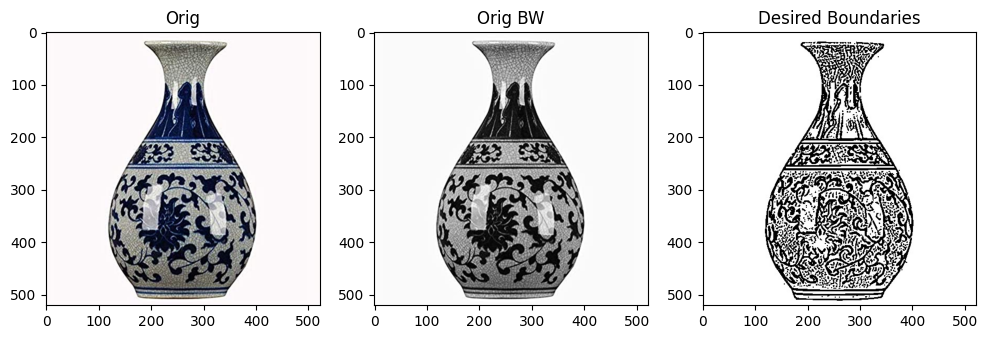

In [2]:
orig=imread("./orig.jpg")
target=imread("./orig_manual_boundary.jpg")
orig_bw=cv2.cvtColor(orig,cv2.COLOR_RGB2GRAY)
image=orig_bw
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(orig)
ax[0].set_title("Orig")
ax[1].imshow(orig_bw,cmap="gray")
ax[1].set_title("Orig BW")
ax[2].imshow(target,cmap="gray")
ax[2].set_title("Desired Boundaries")

In [3]:
# define 2x2 kernal for differenciation wrt x and y
diff_v_kernel=np.array([-1,-1,1,1]).reshape(2,2)
diff_h_kernel=np.array([-1,1,-1,1]).reshape(2,2)
diff_v_kernel,diff_h_kernel

(array([[-1, -1],
        [ 1,  1]]),
 array([[-1,  1],
        [-1,  1]]))

Text(0.5, 1.0, 'diff_avg')

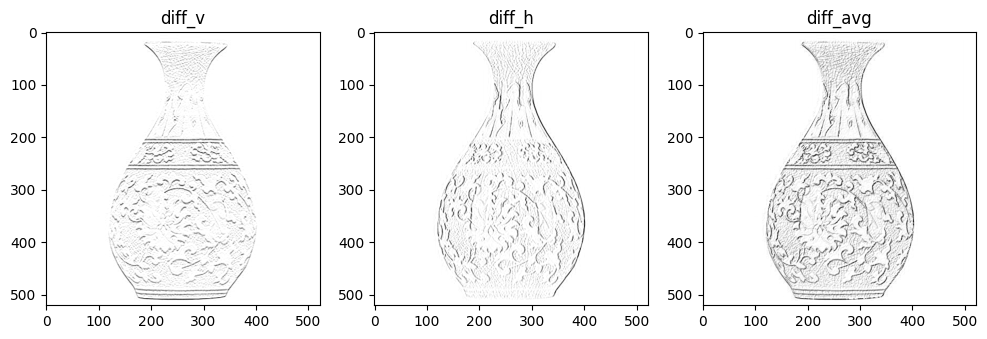

In [4]:
image_diff_v=cv2.filter2D(src=image, ddepth=-1, kernel=diff_v_kernel)
image_diff_h=cv2.filter2D(src=image, ddepth=-1, kernel=diff_h_kernel)
image_diff_avg=(image_diff_v+image_diff_h)/2
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(image_diff_v,cmap="binary")
ax[0].set_title("diff_v")
ax[1].imshow(image_diff_h,cmap="binary")
ax[1].set_title("diff_h")
ax[2].imshow(image_diff_avg,cmap="binary")
ax[2].set_title("diff_avg")

There is a huge difference in the desired output and diff avg. we can further improve edges using thresholding and non-maximum suppression.